In [1]:
import pandas as pd

DADOS = '../dados/Mall_Customers.csv'

df = pd.read_csv(DADOS)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


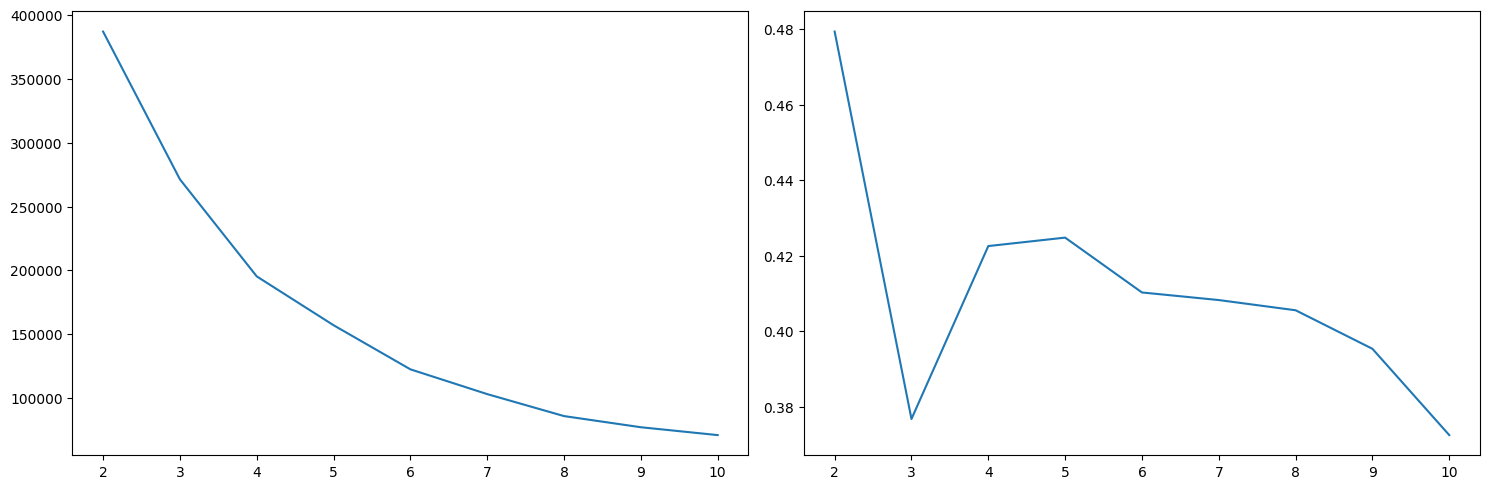

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5), tight_layout=True)

elbow = {}
silhouette = []

RANDOM_STATE = 42
k_range = range(2, 11)

x = df.drop('Gender', axis=1)

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(x)
    elbow[i] = kmeans.inertia_

    labels = kmeans.labels_
    silhouette.append(silhouette_score(x, labels))

sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel('k')
axs[0].set_ylabel('Inertia')
axs[0].set_title('Elbow Method')

sns.lineplot(x=list(k_range), y=silhouette, ax=axs[1])

plt.show()



